In [2]:
import pandas as pd

# Load the dataset
file_path = 'lfd_2023_group2test.csv'
data = pd.read_csv(file_path)

data.head()


,grams,width_cm,length_cm,wavelength,country,cost,recoil,y_offset,shape,distance,target
0,504.0,155,112,597,France,878,19.70,28.70,cuboid,48.41,widget7
1,439.0,166,131,694,Japan,1170,43.28,-27.19,oblong,39.84,widget1
2,492.0,128,147,246,South Korea,1160,60.54,-72.91,cuboid,47.33,widget5
3,615.0,192,103,608,Germany,1272,37.80,-6.59,oblong,29.94,widget7
4,659.0,178,139,348,China,1467,66.60,-143.71,cylinder,45.96,widget5


In [3]:
# Drop the rows with missing 'grams' values
data_cleaned = data.dropna(subset=['grams'])

# Check if there are any more missing values after dropping the rows
missing_values_after_dropping = data_cleaned.isnull().sum()

# Since 'country' and 'shape' are categorical, we will proceed with one-hot encoding for these columns
data_cleaned_encoded = pd.get_dummies(data_cleaned, columns=['country', 'shape'])

# Display the count of missing values after dropping and the first few rows of the new dataframe
missing_values_after_dropping, data_cleaned_encoded.head()
data_cleaned_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4751 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grams                   4751 non-null   float64
 1   width_cm                4751 non-null   int64  
 2   length_cm               4751 non-null   int64  
 3   wavelength              4751 non-null   int64  
 4   cost                    4751 non-null   int64  
 5   recoil                  4751 non-null   float64
 6   y_offset                4751 non-null   float64
 7   distance                4751 non-null   float64
 8   target                  4751 non-null   object 
 9   country_Belgium         4751 non-null   bool   
 10  country_China           4751 non-null   bool   
 11  country_France          4751 non-null   bool   
 12  country_Germany         4751 non-null   bool   
 13  country_India           4751 non-null   bool   
 14  country_Italy           4751 non-null   bool 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Label encode the target variable
label_encoder = LabelEncoder()
data_cleaned_encoded['target'] = label_encoder.fit_transform(data_cleaned_encoded['target'])

# Split the dataset into features and target variable
X = data_cleaned_encoded.drop('target', axis=1)
y = data_cleaned_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize classifiers
naive_bayes_classifier = GaussianNB()
random_forest_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(kernel = 'linear',C=1)

# Train and evaluate Naïve Bayes
start_time = time.time()
naive_bayes_classifier.fit(X_train, y_train)
nb_training_time = time.time() - start_time
nb_predictions = naive_bayes_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Train and evaluate Random Forest
start_time = time.time()
random_forest_classifier.fit(X_train, y_train)
rf_training_time = time.time() - start_time
rf_predictions = random_forest_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Train and evaluate SVM
start_time = time.time()
svm_classifier.fit(X_train, y_train)
svm_training_time = time.time() - start_time
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Summarize results
results = {
    'Naive Bayes': {'Accuracy': nb_accuracy, 'Training Time': nb_training_time},
    'Random Forest': {'Accuracy': rf_accuracy, 'Training Time': rf_training_time},
    'SVM': {'Accuracy': svm_accuracy, 'Training Time': svm_training_time}
}

results


{'Naive Bayes': {'Accuracy': 0.9390115667718192,
  'Training Time': 0.011993169784545898},
 'Random Forest': {'Accuracy': 0.9800210304942166,
  'Training Time': 1.866257905960083},
 'SVM': {'Accuracy': 0.9758149316508938, 'Training Time': 6.957144021987915}}

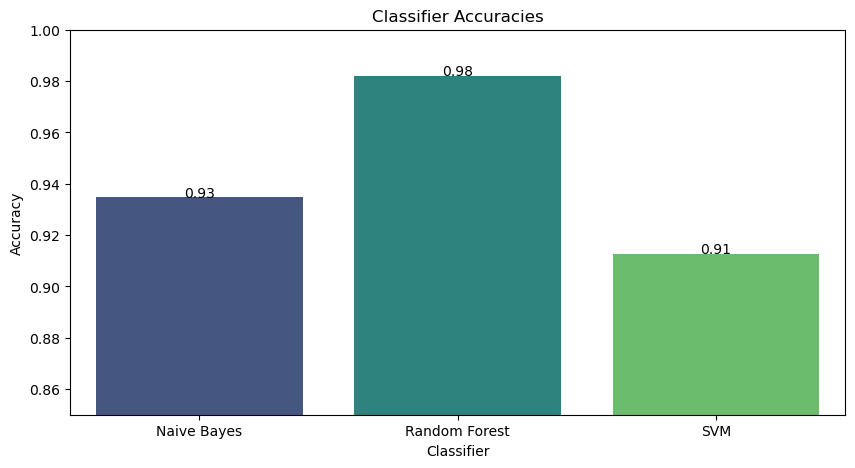

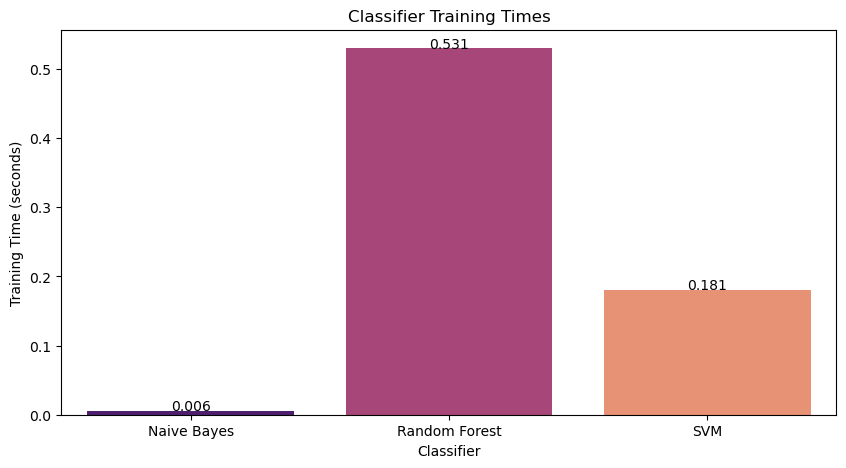

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of classifier accuracies
classifiers = ['Naive Bayes', 'Random Forest', 'SVM']
accuracies = [nb_accuracy, rf_accuracy, svm_accuracy]
training_times = [nb_training_time, rf_training_time, svm_training_time]

# Plotting accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=classifiers, y=accuracies, palette='viridis')
plt.title('Classifier Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
for i in range(len(accuracies)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.2f}', ha = 'center')
plt.ylim(0.85, 1)  # Set the limit to better visualize the differences
plt.show()

# Plotting training times
plt.figure(figsize=(10, 5))
sns.barplot(x=classifiers, y=training_times, palette='magma')
plt.title('Classifier Training Times')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Classifier')
for i in range(len(training_times)):
    plt.text(i, training_times[i], f'{training_times[i]:.3f}', ha = 'center')
plt.show()


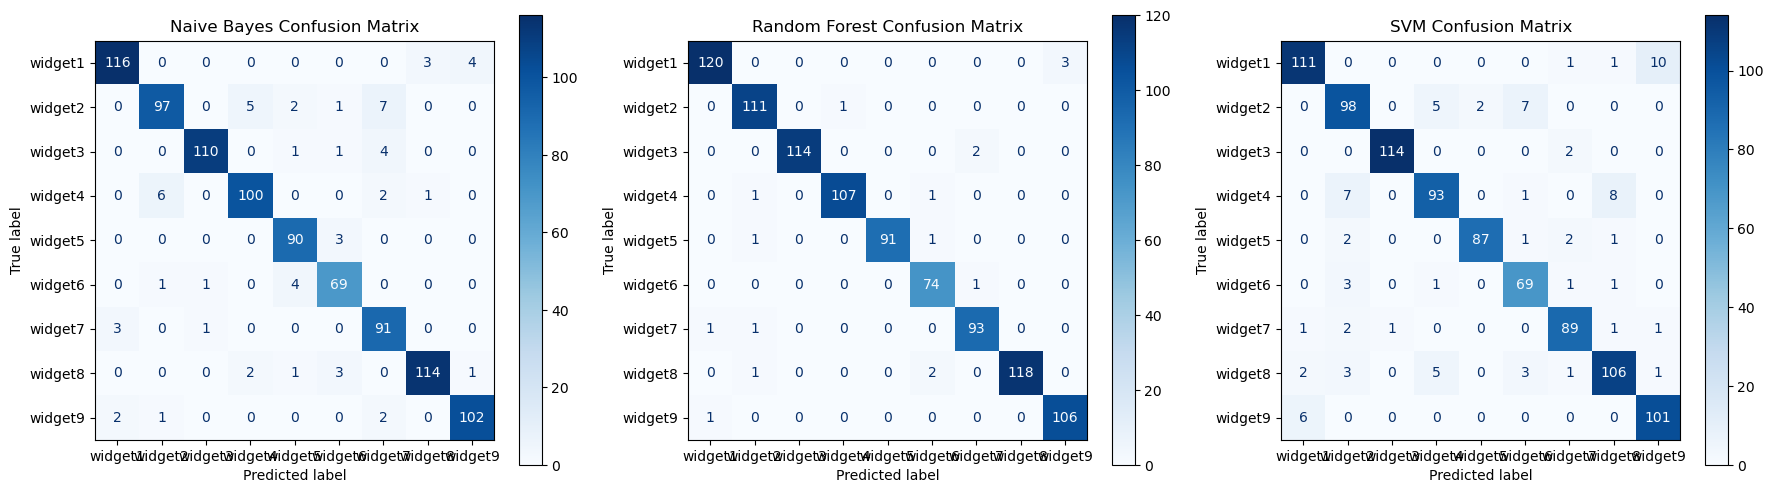

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrices for the classifiers
nb_cm = confusion_matrix(y_test, nb_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[1].set_title('Random Forest Confusion Matrix')
ax[2].set_title('SVM Confusion Matrix')

ConfusionMatrixDisplay(nb_cm, display_labels=label_encoder.classes_).plot(values_format='d', cmap='Blues', ax=ax[0])
ConfusionMatrixDisplay(rf_cm, display_labels=label_encoder.classes_).plot(values_format='d', cmap='Blues', ax=ax[1])
ConfusionMatrixDisplay(svm_cm, display_labels=label_encoder.classes_).plot(values_format='d', cmap='Blues', ax=ax[2])

plt.tight_layout()
plt.show()
